In [ ]:
Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, golden

In [ ]:
Grafica de puntos

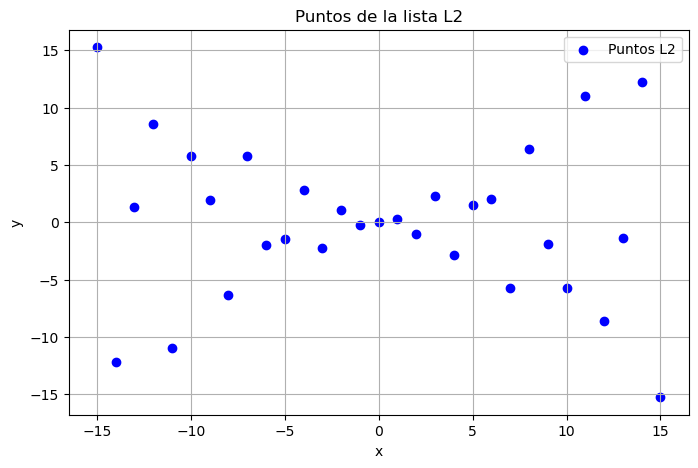

In [20]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta al archivo
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

if os.path.exists(ruta_archivo):
    with open(ruta_archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()

    match = re.search(r'L2\s*=\s*\{(.*?)\}\s*(?:;|\n)', contenido, re.DOTALL)

    if match:
        lista_puntos = match.group(1)
        pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

        # Convertir a float
        x_data = np.array([float(p[0]) for p in pares])
        y_data = np.array([float(p[1]) for p in pares])

        # Gráfica
        plt.figure(figsize=(8, 5))
        plt.scatter(x_data, y_data, color='blue', label='Puntos L2')
        plt.title("Puntos de la lista L2")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.legend()
        plt.show()
else:
    print(f"El archivo no fue encontrado en la ruta: {ruta_archivo}")


In [ ]:
Ajuste de curva

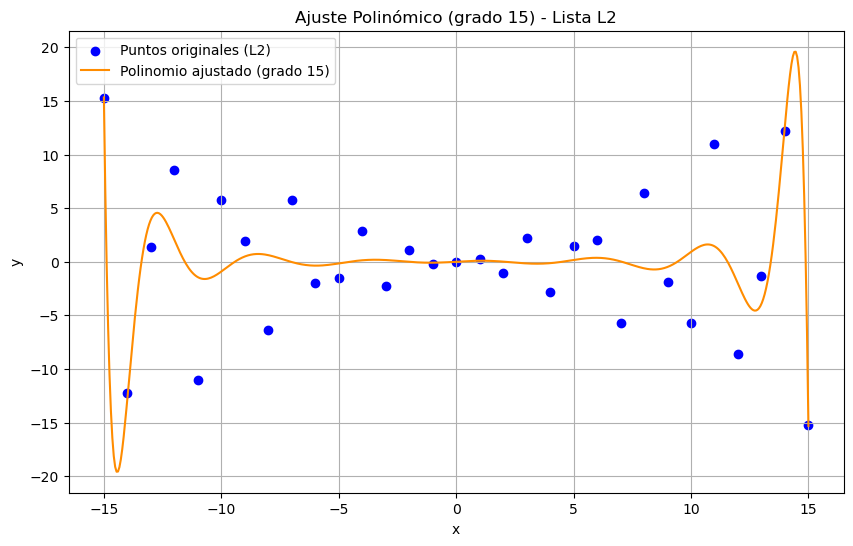

Coeficientes del polinomio (de mayor a menor grado):

[-6.57791540e-14  5.87761189e-26  4.59013972e-11 -1.30548425e-23
 -1.23996675e-08 -4.28198631e-21  1.63792190e-06  1.55537649e-18
 -1.09947405e-04 -1.64389508e-16  3.52538572e-03  6.69314796e-15
 -4.46778240e-02 -9.18734493e-14  1.33952141e-01  3.68915090e-13]


In [22]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta al archivo
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

with open(ruta_archivo, 'r', encoding='utf-8') as file:
    contenido = file.read()

# Buscar contenido de L2
match = re.search(r'L2\s*=\s*\{(.*?)\}\s*(?:;|\n)', contenido, re.DOTALL)

if match:
    lista_puntos = match.group(1)
    pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

    # Datos originales
    x_data = np.array([float(p[0]) for p in pares])
    y_data = np.array([float(p[1]) for p in pares])

    # Ajuste de curva polinómico (grado 15)
    grado = 15
    coeficientes = np.polyfit(x_data, y_data, grado)
    polinomio_ajustado = np.poly1d(coeficientes)

    # Generar puntos suaves para la curva ajustada
    x_curva = np.linspace(min(x_data), max(x_data), 500)
    y_curva = polinomio_ajustado(x_curva)

    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', label='Puntos originales (L2)')
    plt.plot(x_curva, y_curva, color='darkorange', label=f'Polinomio ajustado (grado {grado})')
    plt.title("Ajuste Polinómico (grado 15) - Lista L2")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Mostrar coeficientes
    print("Coeficientes del polinomio (de mayor a menor grado):\n")
    print(coeficientes)


In [ ]:
que funcion nos da?

In [24]:
funcion_str = "f(x) = "
for i, coef in enumerate(polinomio_ajustado.coefficients):
    exp = len(polinomio_ajustado.coefficients) - i - 1
    signo = " + " if coef >= 0 else " - "
    coef_abs = abs(coef)
    if exp > 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x^{exp}"
    elif exp == 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x"
    else:
        funcion_str += f"{signo}{coef_abs:.6e}"

print("Función polinómica ajustada (grado 15):")
print(funcion_str.lstrip(" +"))

Función polinómica ajustada (grado 15):
f(x) =  - 6.577915e-14·x^15 + 5.877612e-26·x^14 + 4.590140e-11·x^13 - 1.305484e-23·x^12 - 1.239967e-08·x^11 - 4.281986e-21·x^10 + 1.637922e-06·x^9 + 1.555376e-18·x^8 - 1.099474e-04·x^7 - 1.643895e-16·x^6 + 3.525386e-03·x^5 + 6.693148e-15·x^4 - 4.467782e-02·x^3 - 9.187345e-14·x^2 + 1.339521e-01·x + 3.689151e-13


In [ ]:
Maximo utilizando el Metodo de Newton-Raphson en el intervalo "[5,9]"

Óptimo encontrado con método de Newton-Raphson:
Iteraciones: 4
x ≈ 5.965227
y ≈ 0.365317


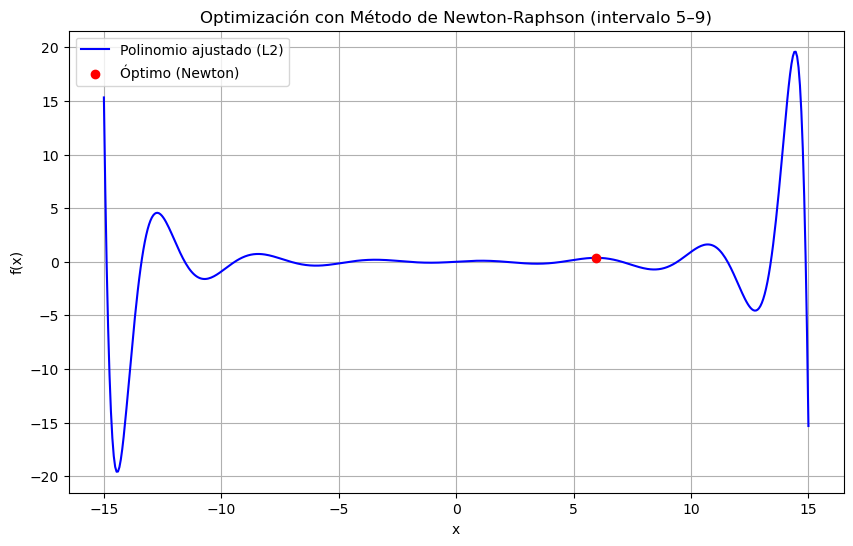

In [33]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Paso 1: Derivar el polinomio 
x = sp.symbols('x')
grado = 15
coeficientes = polinomio_ajustado.coefficients
f_sym = sum(sp.Float(c) * x**(grado - i) for i, c in enumerate(coeficientes))

# Derivadas
f_prime = sp.diff(f_sym, x)
f_double_prime = sp.diff(f_prime, x)

f1 = sp.lambdify(x, f_prime, 'numpy')
f2 = sp.lambdify(x, f_double_prime, 'numpy')

# Paso 2: Método de Newton-Raphson restringido a (5, 9)
x0 = 7.0  
tolerancia = 1e-5
max_iter = 100
iteracion = 0
limite_inferior = 5
limite_superior = 9

while iteracion < max_iter:
    derivada_1 = f1(x0)
    derivada_2 = f2(x0)

    if derivada_2 == 0:
        print("Derivada segunda es cero. El método no puede continuar.")
        break

    x1 = x0 - derivada_1 / derivada_2

    # Limitar el valor dentro del intervalo (5, 9)
    x1 = np.clip(x1, limite_inferior, limite_superior)

    if abs(x1 - x0) < tolerancia:
        break

    x0 = x1
    iteracion += 1

# Resultado final
x_optimo = x1
y_optimo = polinomio_ajustado(x_optimo)

print("Óptimo encontrado con método de Newton-Raphson:")
print(f"Iteraciones: {iteracion}")
print(f"x ≈ {x_optimo:.6f}")
print(f"y ≈ {y_optimo:.6f}")

x_vals = np.linspace(min(x_data), max(x_data), 500)
y_vals = polinomio_ajustado(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Polinomio ajustado (L2)', color='blue')
plt.scatter(x_optimo, y_optimo, color='red', label='Óptimo (Newton)', zorder=5)
plt.title("Optimización con Método de Newton-Raphson (intervalo 5–9)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()
